In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy
from mat2list4LaminarData import EEG4Laminar

In [2]:
data = scipy.io.loadmat("v1_laminar.mat")
laminarData = EEG4Laminar(data)

In [3]:
channel = 6

chanData = laminarData.csddata[channel,:,:]

lowcut = 20

srate = int(laminarData.srate.item())
srate

762

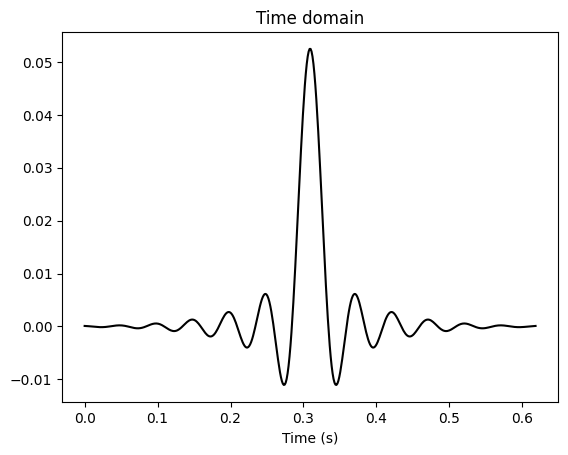

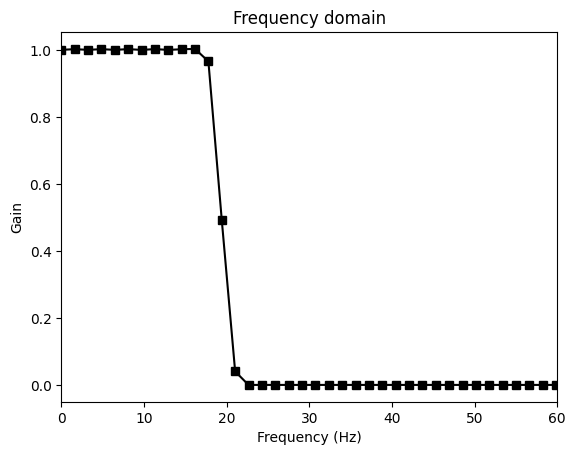

In [4]:
import scipy.fft


filtord = int(18 * (lowcut*1000/srate))

filtkern = scipy.signal.firwin(filtord, lowcut/(srate/2), pass_zero=True)


plt.plot(np.arange(0,len(filtkern))/srate, filtkern, "k")
plt.xlabel("Time (s)")
plt.title("Time domain")
plt.show()

hz = np.linspace(0, srate, len(filtkern))
plt.plot(hz, np.abs(scipy.fft.fft(filtkern))**2, "ks-")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.title("Frequency domain")
plt.xlim([0,lowcut*3])
plt.show()

[]

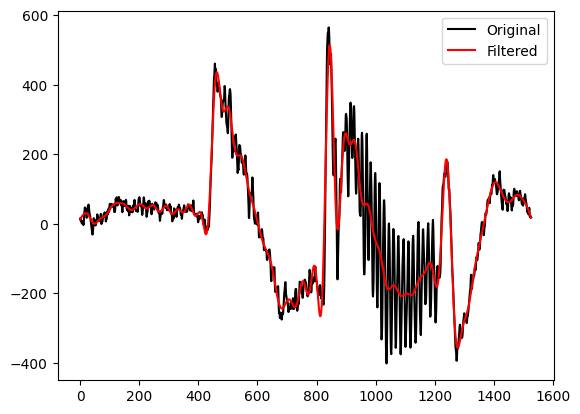

In [5]:
# option 1: filter the ERP
erpOrig = np.mean(chanData, axis=1)

plt.figure()
plt.plot(erpOrig, "k", label="Original")

erp1 = scipy.signal.filtfilt(filtkern, 1, erpOrig)

plt.plot(erp1, "r-", label="Filtered")
plt.legend()
plt.plot()

[]

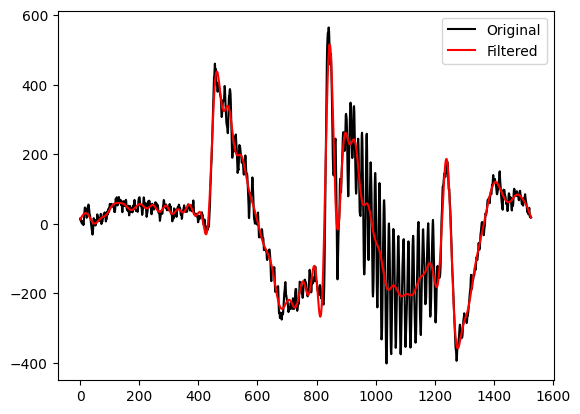

In [6]:
# option 2: filter the single trials
erp2 = np.zeros(len(laminarData.timevec))

plt.figure()
plt.plot(erpOrig, "k", label="Original")

for trial in range(len(chanData[1])):
    erp2 = erp2 + scipy.signal.filtfilt(filtkern, 1, chanData[:,trial])

erp2 = erp2 / trial

plt.plot(erp2, "r-", label="Filtered")
plt.legend()
plt.plot()